<a href="https://colab.research.google.com/github/vanesamp07/Python/blob/main/Prediccion_precios_casas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Librerias basicas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Librerias de ML
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import KFold

#ML - regresión lineal
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

#Estandarización y normalización
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#Metricas de evaluación
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error

In [ ]:
df = pd.read_excel("house_data-Copy1.xlsx")

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


y = price (variable objetivo)

Análisis de información de columnas:

| Columna         | Descripción                                                                  |
| --------------- | ---------------------------------------------------------------------------- |
| `id`            | Identificador único de la propiedad                                          |
| `date`          | Fecha de la venta (formato año/mes/día)                                      |
| `price`         | Precio de venta de la propiedad                                              |
| `bedrooms`      | Número de habitaciones                                                       |
| `bathrooms`     | Número de baños (puede incluir decimales: ej. 2.25 = 2 baños + 1 medio baño) |
| `sqft_living`   | Superficie habitable en pies cuadrados                                       |
| `sqft_lot`      | Tamaño total del terreno en pies cuadrados                                   |
| `floors`        | Número de pisos                                                              |
| `waterfront`    | ¿Tiene vista al agua? (1 = sí, 0 = no)                                       |
| `view`          | Calificación de la vista (0 a 4, siendo 4 la mejor)                          |
| `condition`     | Condición general de la propiedad (1 = mala, 5 = excelente)                  |
| `grade`         | Calificación de la construcción y diseño (1 a 13)                            |
| `sqft_above`    | Superficie habitable sobre el suelo (sin contar sótano)                      |
| `sqft_basement` | Superficie del sótano                                                        |
| `yr_built`      | Año de construcción                                                          |
| `yr_renovated`  | Año de la última renovación (0 si nunca fue renovada)                        |
| `zipcode`       | Código postal                                                                |
| `lat`           | Latitud geográfica                                                           |
| `long`          | Longitud geográfica                                                          |
| `sqft_living15` | Superficie habitable promedio de las 15 casas más cercanas                   |
| `sqft_lot15`    | Tamaño promedio de lote de las 15 casas más cercanas                         |


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
df.shape

(21613, 21)

In [ ]:
#Determinar valores faltantes
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
#Contar valores unicos
df.value_counts()

id          date             price   bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  zipcode  lat      long      sqft_living15  sqft_lot15
1000102     20140916T000000  280000  6         3.00       2400         9373      2.0     0           0     3          7      2400        0              1991      0             98002    47.3262  -122.214  2060           7316          1
6324000090  20150511T000000  210000  2         1.00       990          8140      1.0     0           0     1          6      990         0              1910      0             98116    47.5828  -122.382  2150           5000          1
6329000380  20140619T000000  319950  2         1.00       920          8341      1.0     0           0     3          7      920         0              1939      0             98146    47.5015  -122.380  2330           9792          1
6329000190  20140729T000000  750000  4         1.75       2520   

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
#Determinar duplicados
df1 =df[df.duplicated()]

In [ ]:
#Imprimos resultados
#No tenemos duplicados
print("Datos duplicados: ", df1)

Datos duplicados:  Empty DataFrame
Columns: [id, date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15]
Index: []

[0 rows x 21 columns]


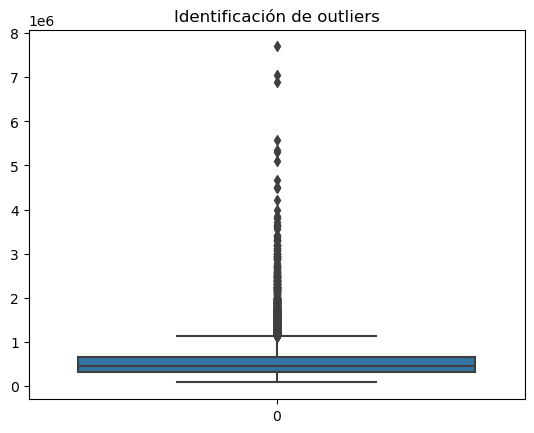

In [ ]:
sns.boxplot(df["price"])
plt.title("Identificación de outliers")
plt.show()

C:\Users\Usuario\.ms-ad\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


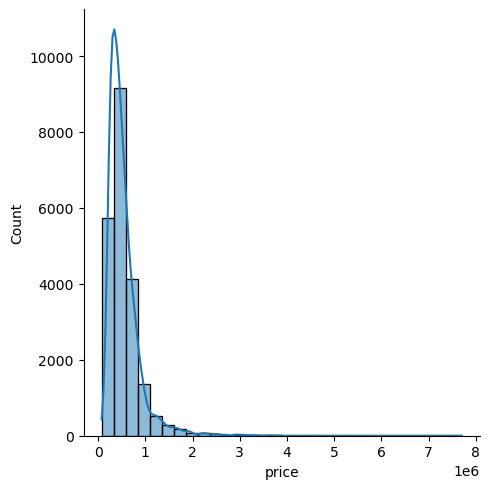

In [ ]:
#Revisar distribucción de datos
sns.displot(df["price"], bins=30, kde=True)

De la anterior distribucción de precios, se determina que los datos estan ajustados a la izquierda.

In [ ]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
df_nuevo = df.drop(columns=["date"])

In [ ]:
df_nuevo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  int64  
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [ ]:
#Analizar correlacción de datos entre variables numericas
df_nuevo.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


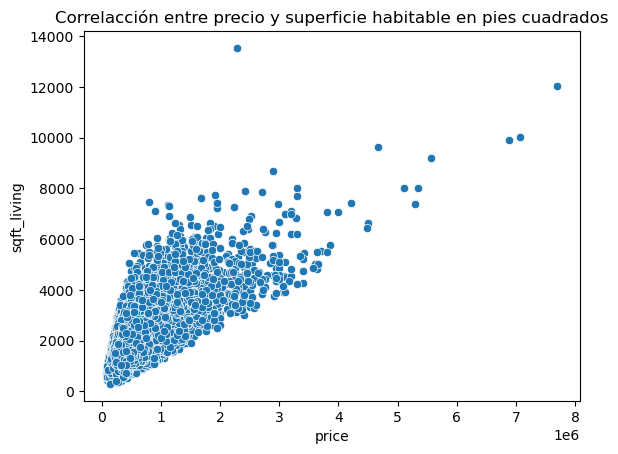

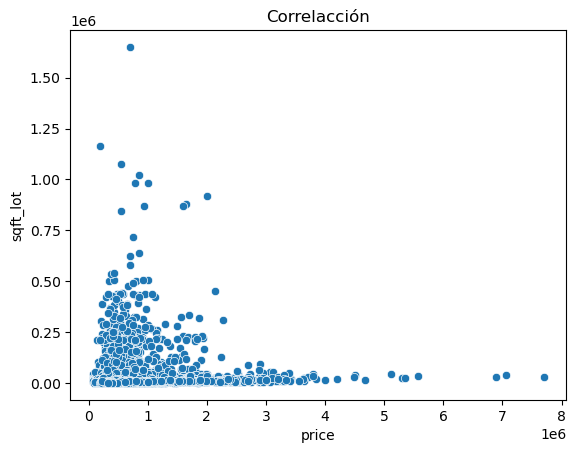

In [ ]:
#Correlaciones positivas (sí aumenta una, es muy probable que la otra igual)
sns.scatterplot(x=df["price"], y=df["sqft_living"])
plt.title("Correlacción entre precio y superficie habitable en pies cuadrados")
plt.show()

sns.scatterplot(x=df["price"], y=df["sqft_lot"])
plt.title("Correlacción")
plt.show()


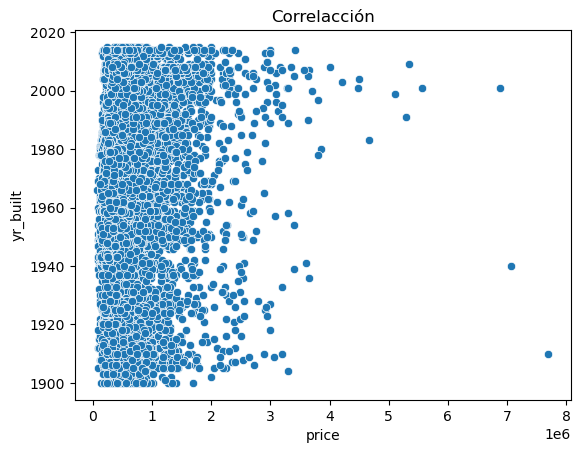

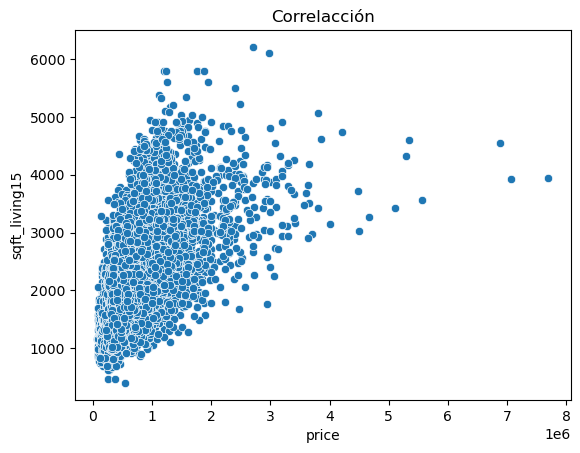

In [ ]:
sns.scatterplot(x=df["price"], y=df["yr_built"])
plt.title("Correlacción")
plt.show()

sns.scatterplot(x=df["price"], y=df["sqft_living15"])
plt.title("Correlacción")
plt.show()

De las comparaciones realizadas previamente, podemos identificar que existe una mayor correlación entre el precio y la superficie habitable en pies cuadrados, así como entre el precio y la superficie habitable promedio de las 15 casas más cercanas.

In [ ]:
#División del conjunto de datos en conjuntos de entrenamiento y prueba
X = pd.get_dummies(df).drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
#Estandarización
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  #Train
X_test_scaled = scaler.transform(X_test)        #Test

#Normalización
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
def find_best_model(X, y):
    #Definir los hiperparámetros a ajustar para cada algoritmo
    lasso_params = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
    ridge_params = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
    elastic_params = {'alpha': [0.001, 0.01, 0.1, 1, 10],
                      'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]}
    tree_params = {'max_depth': [None, 10, 20, 30],
                   'min_samples_split': [2, 5, 10],
                   'min_samples_leaf': [1, 2, 4]}

    #Definir los modelos
    lasso = Lasso()
    ridge = Ridge()
    elastic = ElasticNet()
    tree = DecisionTreeRegressor()

    #Realizar la búsqueda de hiperparámetros utilizando validación cruzada
    models = [lasso, ridge, elastic, tree]
    params = [lasso_params, ridge_params, elastic_params, tree_params]
    best_model = None
    best_params = None
    best_score = float('-inf')

    models_save = []

    for model, param_grid in zip(models, params):
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
        grid_search.fit(X, y)

        if grid_search.best_score_ > best_score:
            best_score = grid_search.best_score_
            best_model = model
            best_params = grid_search.best_params_
        print("Best Model: ", grid_search.best_estimator_)
        print("Best params: ", grid_search.best_params_)
        print("Ajuste: ", -grid_search.best_score_)
        print('-'*100)
        models_save.append(grid_search.best_estimator_)

    return best_model, best_params, models_save

In [ ]:
best_model, best_params, models = find_best_model(X_train, y_train)
print("Mejor modelo:", best_model)
print("Mejores hiperparámetros:", best_params)

C:\Users\Usuario\.ms-ad\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.905e+14, tolerance: 1.469e+11
  model = cd_fast.enet_coordinate_descent(
C:\Users\Usuario\.ms-ad\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.887e+14, tolerance: 1.450e+11
  model = cd_fast.enet_coordinate_descent(
C:\Users\Usuario\.ms-ad\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.897e+14, tolerance: 

Best Model:  Lasso(alpha=10)
Best params:  {'alpha': 10}
Ajuste:  39184359345.51105
----------------------------------------------------------------------------------------------------


C:\Users\Usuario\.ms-ad\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.04691e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\Usuario\.ms-ad\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.04755e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\Usuario\.ms-ad\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.04089e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\Usuario\.ms-ad\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.05234e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\Usuario\.ms-ad\Lib\site-packages\sklearn\linear_model\_ridge.py:216: Li

Best Model:  Ridge(alpha=10)
Best params:  {'alpha': 10}
Ajuste:  38664216671.63878
----------------------------------------------------------------------------------------------------


C:\Users\Usuario\.ms-ad\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.140e+14, tolerance: 1.469e+11
  model = cd_fast.enet_coordinate_descent(
C:\Users\Usuario\.ms-ad\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.137e+14, tolerance: 1.450e+11
  model = cd_fast.enet_coordinate_descent(
C:\Users\Usuario\.ms-ad\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.149e+14, tolerance: 

In [ ]:
models

In [ ]:
best_model

In [ ]:
#Hiperparametros de regularización
alphas = np.logspace(-4, 4, 50)
ridge_scores = []
lasso_scores = []
elastic_scores = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    lasso = Lasso(alpha=alpha, max_iter=10000)
    elastic = ElasticNet(alpha=alpha, l1_ratio=0.5, max_iter=10000)

    ridge_scores.append(np.mean(cross_val_score(ridge, X_train_scaled, y_train, cv=5, scoring='r2')))
    lasso_scores.append(np.mean(cross_val_score(lasso, X_train_scaled, y_train, cv=5, scoring='r2')))
    elastic_scores.append(np.mean(cross_val_score(elastic, X_train_scaled, y_train, cv=5, scoring='r2')))

plt.figure(figsize=(10, 6))
plt.plot(alphas, ridge_scores, label='Ridge')
plt.plot(alphas, lasso_scores, label='Lasso')
plt.plot(alphas, elastic_scores, label='ElasticNet')
plt.xscale('log')
plt.xlabel('Alpha (regularización)')
plt.ylabel('R² promedio (validación cruzada)')
plt.title('Comparación de modelos con regularización')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#Arboles de decision
depths = range(1, 21)
dt_scores = []

for d in depths:
    tree = DecisionTreeRegressor(max_depth=d, random_state=42)
    dt_scores.append(np.mean(cross_val_score(tree, X_train_scaled, y_train, cv=5, scoring='r2')))

plt.figure(figsize=(8, 5))
plt.plot(depths, dt_scores, marker='o')
plt.xlabel('Profundidad del árbol (max_depth)')
plt.ylabel('R² promedio (validación cruzada)')
plt.title('Ajuste de hiperparámetro en árbol de decisión')
plt.grid(True)
plt.show()

In [ ]:
import pickle

In [ ]:
def evaluation_model(model, X_test, y_test, name):
    y_predict = model.predict(X_test)
    print('R2: ', r2_score(y_predict, y_test))
    print('RMSE: ', mean_squared_error(y_predict, y_test))
    print('MAPE: ', mean_absolute_percentage_error(y_predict, y_test))
    with open(f'./{name}_cars.pkl', 'wb') as f:
        pickle.dump(model, f)

In [ ]:
names = ['lasso', 'ridge', 'elastic_net', 'regresion_tree']

for n, m in zip(names, models):
    print(n)
    evaluation_model(m, X_test, y_test, n)
    print('-'*100)